In [1692]:
#michael is sus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

In [1693]:
company_tweet = pd.read_csv('Data/Tweets/Company_Tweet.csv')
tweet = pd.read_csv('Data/Tweets/Tweet.csv')
company = pd.read_csv('Data/Tweets/Company.csv')
company_value = pd.read_csv('Data/CompanyStocks/CompanyValues.csv')

In [1694]:
tweet = tweet.dropna()
#merge company tweets and tweets on id
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")

In [1695]:
#create variable 'total_engagement'
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]
#remove tweets below certain engagement
engagement_threshold = 40
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]
tweet_df.head()
print('tweet count: ', tweet_df.size)

tweet count:  485118


In [1696]:
#convert original time on tweet_df to date time
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [1697]:
#order chronilogically
tweet_df = tweet_df.sort_values(by="day_date")

In [1698]:
#convert time value on company stock data to date time
stock_df = company_value
stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])
stock_df.sample(5)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
10984,GOOG,2016-07-10,705.63,1573909,699.50,705.71,696.435
12261,MSFT,2016-11-22,61.12,23205870,60.98,61.26,60.805
7639,GOOGL,2014-07-29,593.95,1364289,597.70,598.49,592.170
2643,AAPL,2016-02-07,94.02,46315620,96.52,96.92,93.690
15927,TSLA,2014-08-05,238.49,5374539,237.47,242.99,235.690


In [1699]:
#drop un-needed features
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [1700]:
#remove any stock data that is outside of the tweet data
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [1701]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

In [1702]:
#sort stock data chronilogically
stock_df = stock_df.sort_values(by="day_date")
stock_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
2517,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
10810,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.40,530.20
16960,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5602,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [1703]:
tweet_df.head()

,ticker_symbol,writer,body,total_engangement,day_date
40,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,64,2015-01-01
47,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",347,2015-01-01
239,AAPL,greatspoke,Top Stock Analyst Releases Report on Top Stock...,433,2015-01-01
240,AAPL,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01
241,AMZN,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01


In [1704]:
APPL_df = stock_df.loc[stock_df['ticker_symbol'] == 'AAPL']

GOOG_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOG']
GOOGL_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOGL']


TSLA_df = stock_df.loc[stock_df['ticker_symbol'] == 'TSLA']
AMZN_df = stock_df.loc[stock_df['ticker_symbol'] == 'AMZN']
MSFT_df = stock_df.loc[stock_df['ticker_symbol'] == 'MSFT']

In [1705]:
#there are two types of google stocks, one has voting power in the company while the other doesnt
GOOGL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.4000,530.20
7530,GOOGL,2015-01-02,529.55,1325271,532.60,535.8000,527.88
8688,GOOGL,2015-01-03,529.55,1325271,532.60,535.8000,527.88
8689,GOOGL,2015-01-04,529.55,1325271,532.60,535.8000,527.88
7529,GOOGL,2015-01-05,519.46,2054120,527.15,527.9899,517.75


In [1706]:
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

In [1707]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1708]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string


In [1709]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [1710]:
tweet_df["body"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["body"] = tweet_df["body"].str.lower()
tweet_df.sample(5)

# ?? why is the body text so fucked up ??

,ticker_symbol,writer,body,total_engangement,day_date
4058511,TSLA,evdefender,tesla has logged (zero) autonomous miles in t...,45,2019-04-13
3862160,TSLA,WintonCapPtnrs,"to be % clear, musk's actions were so egregiou...",56,2018-09-28
4016207,TSLA,PlugInFUD,elmer terminal surmising:elon literally announ...,76,2019-03-07
3906405,TSLA,TESLAcharts,"amazingly, twitter is free...$tsla",120,2018-10-27
1389960,AAPL,JamarlinMartin,"ghogh episode with liz burr.""the black folks ...",50,2018-08-07


In [1711]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [1712]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [1713]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

In [1714]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))


In [1715]:
#create a weighted scored based off engagement and sentiment analysis score
tweet_df['summarative_score'] = tweet_df['total_engangement'] * tweet_df['vander_score'] * 0.01
tweet_df = tweet_df.drop(['total_engangement', 'vander_score'], axis=1)


In [1716]:
#sum or avg the summarative_scores for one date
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

GOOG_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOG']
GOOGL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOGL']


TSLA_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'TSLA']
AMZN_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AMZN']
MSFT_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'MSFT']

In [1717]:
GOOG_tweet.head()

,ticker_symbol,writer,body,day_date,summarative_score
1850635,GOOG,WSJ,google now controls or occupies a strip of man...,2015-01-04,0.000000
4040,GOOG,DanielEran,"despite lawsuit, $aapl ios is far more storag...",2015-01-05,0.410522
1854377,GOOG,WSJ,google is exploring how to use frequencies to ...,2015-01-20,0.000000
1854055,GOOG,WSJ,google is close to investing $ billion in spac...,2015-01-20,1.547000
1854431,GOOG,The_Real_Fly,"obama is long $ebay, $goog and $tsla",2015-01-21,0.000000


In [1718]:
APPL_tweet = APPL_tweet.groupby('day_date')['summarative_score'].sum()
GOOG_tweet = GOOG_tweet.groupby('day_date')['summarative_score'].sum()
GOOGL_tweet = GOOGL_tweet.groupby('day_date')['summarative_score'].sum()
TSLA_tweet = TSLA_tweet.groupby('day_date')['summarative_score'].sum()
AMZN_tweet = AMZN_tweet.groupby('day_date')['summarative_score'].sum()
MSFT_tweet = MSFT_tweet.groupby('day_date')['summarative_score'].sum()


In [1719]:
APPL_df = APPL_df.merge(APPL_tweet, how = 'outer', on = 'day_date')
GOOG_df = APPL_df.merge(GOOG_tweet, how = 'outer', on = 'day_date')
GOOGL_df = APPL_df.merge(GOOGL_tweet, how = 'outer', on = 'day_date')
TSLA_df = APPL_df.merge(TSLA_tweet, how = 'outer', on = 'day_date')
AMZN_df = APPL_df.merge(AMZN_tweet, how = 'outer', on = 'day_date')
MSFT_df = APPL_df.merge(MSFT_tweet, how = 'outer', on = 'day_date')

APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,NaN
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415


In [1720]:
#APPL_df = APPL_df.replace(to_replace = np.nan, value = 0)
#GOOG_df.replace(to_replace = np.nan, value = 0)
#GOOGL_df.replace(to_replace = np.nan, value = 0)
#AMZN_df.replace(to_replace = np.nan, value = 0)
#TSLA_df.replace(to_replace = np.nan, value = 0)
#MSFT_df.replace(to_replace = np.nan, value = 0)


<AxesSubplot:xlabel='day_date'>

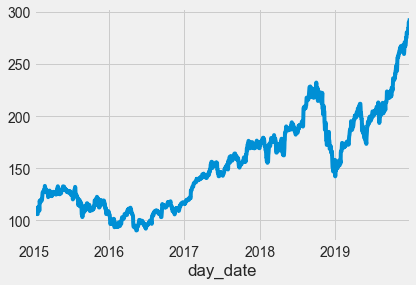

In [1721]:
#stock prices over time
APPL_df.set_index('day_date')['close_value'].plot()

In [1722]:
# turn stock prices --> stock returns
APPL_df['returns'] = APPL_df['close_value'].pct_change()
APPL_df.replace(to_replace = np.nan, value = 0)

APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score,returns
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989,NaN
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350,-0.009513
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,NaN,0.000000
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136,0.000000
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415,-0.028172


<AxesSubplot:xlabel='day_date'>

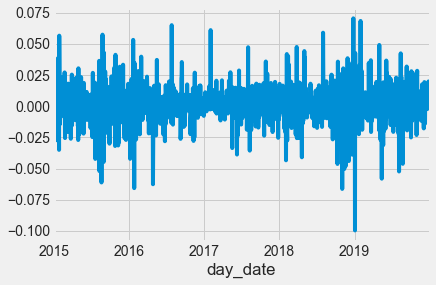

In [1723]:

APPL_df.set_index('day_date')['returns'].plot()

# # LSTM MODEL: 

In [1724]:
#pip install tensorflow==2.9.1


In [1725]:
#here we will do the LSTM model

#/-\|/-\|
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.layers import Dense, LSTM

from keras.optimizers import Adam

plt.style.use('fivethirtyeight')


In [1726]:
#scaler = MinMaxScaler().fit(x_test)
#print(scaler2)
#print(scaler2.data_min_)
#print(scaler2.feature_range)
#x_test = scaler2.transform(x_test)

#print(x_test)

In [1727]:
#Scale Features: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
#scaler = MinMaxScaler(feature_range = (0,1))
#x_train = scaler.fit_transform(x_train)

#print(x_train)


In [1728]:
APPL_df = APPL_df.fillna(0)
APPL_df.pop('ticker_symbol')



0       AAPL
1       AAPL
2       AAPL
3       AAPL
4       AAPL
        ... 
1821    AAPL
1822    AAPL
1823    AAPL
1824    AAPL
1825    AAPL
Name: ticker_symbol, Length: 1826, dtype: object

In [1729]:
APPL_df.head()


,day_date,close_value,volume,open_value,high_value,low_value,summarative_score,returns
0,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989,0.000000
1,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350,-0.009513
2,2015-01-03,109.33,53143770,111.39,111.44,107.35,0.000000,0.000000
3,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136,0.000000
4,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415,-0.028172


In [1730]:
#forecast_out= 3
#x1 = APPL_df.iloc[: , 3:]
#APPL_df['PrevNClose'] = APPL_df[['close_value']].shift(forecast_out)
#x3 = APPL_df['PrevNClose']
#print(x3.shape)
#print(x3)


#X = pd.concat([x1, x3] , axis = 1)
#X.pop("close_value")
#X.pop("summarative_score")
#X = X.drop(labels = None, axis = 0, index = 'close_value')
#X= X[forecast_out:]
y = APPL_df['returns']
X = APPL_df.drop(['returns', 'close_value', 'day_date'], axis=1)



#print(X.shape)
print(X)
print(y)
#y = APPL_df[['close_value']]
#y = y[forecast_out:]
#print(y)

        volume  open_value  high_value  low_value  summarative_score
0     41304780      112.82      113.13     110.21           3.911989
1     53143770      111.39      111.44     107.35           2.044350
2     53143770      111.39      111.44     107.35           0.000000
3     53143770      111.39      111.44     107.35           1.740136
4     64210880      108.29      108.65     105.41           0.866415
...        ...         ...         ...        ...                ...
1821  36592940      291.12      293.97     288.12           0.115701
1822  36592940      291.12      293.97     288.12           0.411740
1823  36592940      291.12      293.97     288.12           2.102808
1824  36059610      289.46      292.69     285.22           7.807207
1825  25247630      289.93      293.68     289.52           1.383618

[1826 rows x 5 columns]
0       0.000000
1      -0.009513
2       0.000000
3       0.000000
4      -0.028172
          ...   
1821   -0.000379
1822    0.000000
1823    0.0

In [1731]:
#Split Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, shuffle = False)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))


print(x_train.shape)
print(y_train.shape)




(1460, 5)
(1460,)


In [1732]:
type(x_train)

numpy.ndarray

In [1733]:
#print(x_train.count)

In [1734]:
from keras.preprocessing.sequence import TimeseriesGenerator
window_length = 7
batch_size = 32
num_features = 5

#TimeseriesGenerator(x_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)[0]

In [1735]:
train_generator = TimeseriesGenerator(x_train, y_train,
                                      length=window_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

test_generator = TimeseriesGenerator(x_test, y_test,
                                     length=window_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)

In [1736]:
print(len(train_generator))

46


In [1795]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (window_length, num_features), return_sequences=True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

#model.add(tf.keras.layers.LSTM(80, input_shape= (window_length, num_features), return_sequences=True))

#model.add(tf.keras.layers.Dropout(0.3)) 
#model.add(tf.keras.layers.LSTM(32, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))



#model.compile(optimizer='adam', loss='mse')



In [1796]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_153 (LSTM)             (None, 7, 128)            68608     
                                                                 
 dropout_81 (Dropout)        (None, 7, 128)            0         
                                                                 
 lstm_154 (LSTM)             (None, 7, 50)             35800     
                                                                 
 dropout_82 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_155 (LSTM)             (None, 7, 50)             20200     
                                                                 
 dropout_83 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_156 (LSTM)             (None, 50)              

In [1797]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])



In [1798]:
history = model.fit(train_generator, epochs=150,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/150
46/46 [==============================] - 7s 44ms/step - loss: 7.8674e-04 - mean_absolute_error: 0.0199 - val_loss: 1.6584e-04 - val_mean_absolute_error: 0.0081
Epoch 2/150
46/46 [==============================] - 1s 18ms/step - loss: 2.4384e-04 - mean_absolute_error: 0.0114 - val_loss: 1.7121e-04 - val_mean_absolute_error: 0.0085
Epoch 3/150
46/46 [==============================] - 1s 18ms/step - loss: 2.0831e-04 - mean_absolute_error: 0.0102 - val_loss: 1.7464e-04 - val_mean_absolute_error: 0.0088
Epoch 4/150
46/46 [==============================] - 1s 18ms/step - loss: 2.0402e-04 - mean_absolute_error: 0.0100 - val_loss: 1.7761e-04 - val_mean_absolute_error: 0.0089
Epoch 5/150
46/46 [==============================] - 1s 18ms/step - loss: 1.9629e-04 - mean_absolute_error: 0.0098 - val_loss: 1.6930e-04 - val_mean_absolute_error: 0.0084
Epoch 6/150
46/46 [==============================] - 1s 18ms/step - loss: 1.8874e-04 - mean_absolute_error: 0.0094 - val_loss: 1.7105e-04 - 

In [1799]:
test_generator[0]

(array([[[ 3.4499390e+07,  1.5853000e+02,  1.5936000e+02,  1.5648000e+02,
           5.1809400e-01],
         [ 3.4499390e+07,  1.5853000e+02,  1.5936000e+02,  1.5648000e+02,
           2.4025500e+00],
         [ 3.5637070e+07,  1.5489000e+02,  1.5885000e+02,  1.5423000e+02,
          -7.7482780e+00],
         ...,
         [ 5.7423650e+07,  1.4453000e+02,  1.4854990e+02,  1.4380000e+02,
          -6.5565440e+00],
         [ 5.7423650e+07,  1.4453000e+02,  1.4854990e+02,  1.4380000e+02,
           4.1472900e-01],
         [ 5.7423650e+07,  1.4453000e+02,  1.4854990e+02,  1.4380000e+02,
           1.0976500e+00]],
 
        [[ 3.4499390e+07,  1.5853000e+02,  1.5936000e+02,  1.5648000e+02,
           2.4025500e+00],
         [ 3.5637070e+07,  1.5489000e+02,  1.5885000e+02,  1.5423000e+02,
          -7.7482780e+00],
         [ 9.1106840e+07,  1.4398000e+02,  1.4572000e+02,  1.4200000e+02,
          -1.1396768e+01],
         ...,
         [ 5.7423650e+07,  1.4453000e+02,  1.4854990e+02,  1

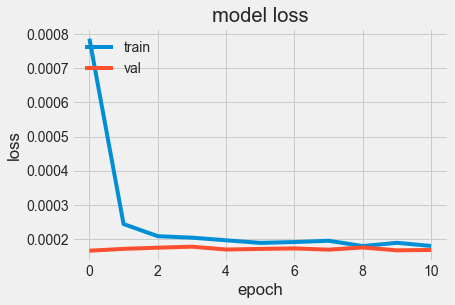

In [1800]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [1801]:
model.evaluate(test_generator, verbose=0)  

[0.00016798394790384918, 0.008299259468913078]

In [1802]:
predictions=model.predict_generator(test_generator)

C:\Users\Michael\AppData\Local\Temp/ipykernel_6820/2533966764.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [1803]:
y_test.shape[0] - window_length


359

In [1808]:
predictions

array([-0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00113081,
       -0.00113081, -0.00113081, -0.00113081, -0.00113081, -0.00

In [1804]:
predictions = predictions.flatten()

In [1805]:
predictions.shape[0] / 359

1.0

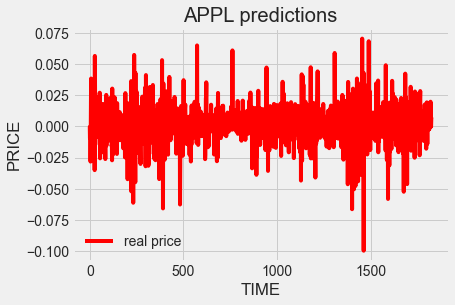

In [1806]:
plt.plot(APPL_df['returns'].to_numpy(), color = 'red', label = 'real price')
#plt.plot(predictions, color = 'blue', label = 'predicted price')
plt.title('APPL predictions')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


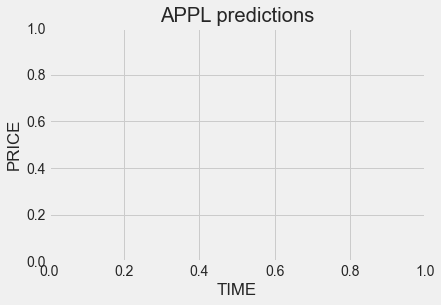

In [1807]:
#plt.plot(APPL_df['returns'].to_numpy(), color = 'red', label = 'real price')
#plt.plot(predictions.flatten(), color = 'blue', label = 'predicted price')
plt.title('APPL predictions')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()